Author: Samuel Noriega

# Predecir si un usuario comprará algo en los próximos 90 días.

El problema consiste en el analisis de un dataset anonimizado de una base de datos de una tienda de E-commerce. En este ejemplo haremos un analisis descriptivo para más adelante crear un modelo que pueda predecir si un usuario comprará o no un producto 90 días después de registrarse en el sitio web.


El dataset incluye los siguientes campos: 
<ul>
    <li><strong>user_id:</strong> Identificador de usuario</li>
    <li><strong>created_at:</strong> Fecha que se creó la cuenta</li>
    <li><strong>birthyear:</strong> Año de nacimiento del usuario</li>
    <li><strong>gender:</strong> Genero </li>
    <li><strong>is_active:</strong> Si el usuario está activo</li>
    <li><strong>maildomain:</strong> El email del usuario</li>
    <li><strong>region:</strong> Region </li>
    <li><strong>orig_1:</strong> Origen 1 </li>
    <li><strong>orig_2:</strong> Origen 2 </li>
    <li><strong>utm_src:</strong> UTM source cuando el usuario fue registrado</li>
    <li><strong>utm_med:</strong> UTM medium de cuando el usaurio fue registrado</li>
    <li><strong>utm_cpg:</strong> UTM campaign cuando el usaurio fue registrado </li>
    <li><strong>channel:</strong> Canal de adquisición del usuario </li>
    <li><strong>dx_0:</strong> User profile feature </li>
    <li><strong>dx_1:</strong> User profile feature</li>
    <li><strong>dx_2:</strong> User profile feature</li>
    <li><strong>dx_3:</strong> User profile feature </li>
    <li><strong>gx:</strong> User profile feature </li>
    <li><strong>im:</strong> User profile feature </li>
    <li><strong>purchase_90_n:</strong>Número de compras durante los primeros 90 días después del registro.</li>
    <li><strong>purchase_90_bin:</strong> Si el usuario hizo o no una compra dentro de los primeros 90 días despues de su registro.</li>
</ul>

Nota: Los ultimos dos campos (purchase_90_n and purchase_90_bin) están relacionados con la variable objetivo.

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# load and read our dataset for initial exploration
df = pd.read_csv('ds_dataset.csv', sep = ',')

# preview our data
df.head(5)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,utm_cpg,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin
0,161784,2017-06-27 19:26:51,1990.0,NaN,0,5910,308.0,45.0,NaN,74.0,...,NaN,7.0,31.104501,5.609922,38.011426,73.155654,-40.377089,0.340052,0.0,0
1,245769,2017-11-22 04:59:44,NaN,NaN,0,5910,290.0,42.0,NaN,74.0,...,NaN,7.0,49.740220,2.608536,48.953180,75.468076,-24.818587,0.782523,0.0,0
2,140191,2017-05-16 15:52:38,NaN,1.0,1,5326,308.0,15.0,NaN,67.0,...,NaN,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1
3,176141,2017-07-21 10:16:49,NaN,NaN,0,5326,308.0,49.0,21385.0,55.0,...,NaN,9.0,54.493092,4.176993,50.066720,36.941482,-53.010936,0.088452,0.0,0
4,97642,2017-02-19 07:46:55,1994.0,NaN,0,5326,59.0,49.0,13773.0,55.0,...,NaN,9.0,54.268673,4.419244,68.248199,40.742681,-90.132536,0.252442,0.0,0


In [3]:
#sanity check
df.shape

(50000, 21)

In [4]:
df.describe()

,user_id,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,utm_med,utm_cpg,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin
count,50000.000000,43266.000000,5431.000000,50000.000000,50000.000000,49827.000000,49529.000000,24430.000000,49997.000000,49996.000000,3.000000,49999.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,159249.006700,1983.929621,0.528632,0.068600,6149.670880,395.650772,43.848392,15916.429718,70.106066,11.945216,9.333333,5.975220,50.023323,4.996994,49.947865,48.394240,0.313389,5.010035e-01,0.337640,0.185420
std,92327.332749,27.825342,0.499226,0.252775,2033.609336,230.330474,20.311496,9569.291488,20.596572,4.600871,0.577350,3.024429,10.057470,2.611690,9.991934,14.962197,40.110482,2.890637e-01,1.005534,0.388642
min,0.000000,1710.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,7.926477,-8.426272,10.348532,-11.507265,-196.201315,4.647376e-07,0.000000,0.000000
25%,78979.750000,1979.000000,0.000000,0.000000,5326.000000,234.000000,22.000000,6172.000000,55.000000,8.000000,9.000000,4.000000,43.325705,3.257855,43.131497,38.314548,-26.726727,2.503440e-01,0.000000,0.000000
50%,159197.000000,1987.000000,1.000000,0.000000,5326.000000,308.000000,45.000000,17348.500000,67.000000,13.000000,9.000000,7.000000,50.055433,4.998784,49.989463,48.381867,0.423808,5.014877e-01,0.000000,0.000000
75%,239042.500000,1992.000000,1.000000,0.000000,5910.000000,598.000000,64.000000,24244.000000,74.000000,14.000000,9.500000,9.000000,56.744732,6.737399,56.667394,58.465906,27.289090,7.518443e-01,0.000000,0.000000
max,319641.000000,2217.000000,1.000000,1.000000,13604.000000,940.000000,76.000000,30446.000000,185.000000,28.000000,10.000000,12.000000,93.441389,18.347194,91.989327,108.168888,156.352032,9.999910e-01,29.000000,1.000000


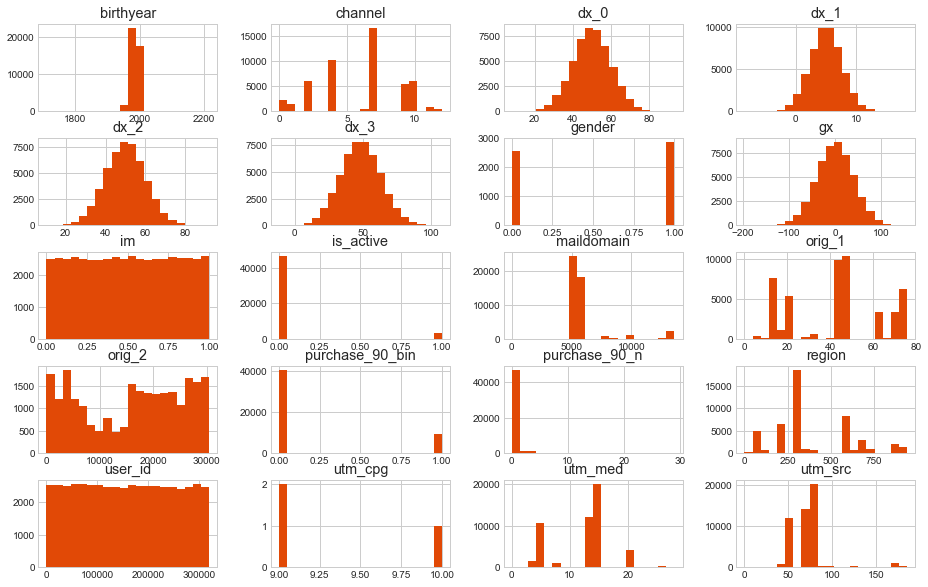

In [5]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

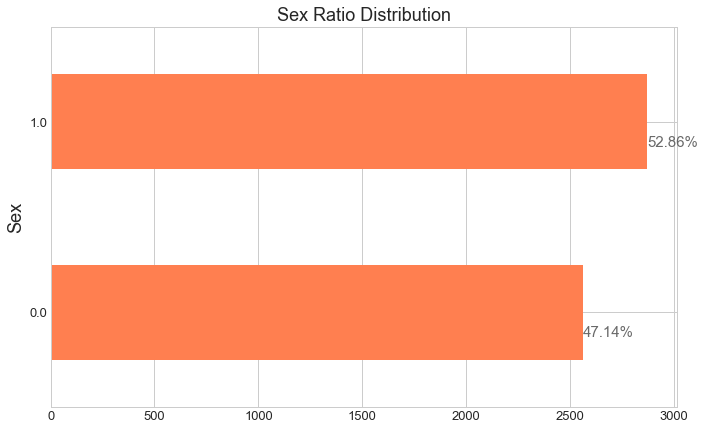

In [6]:
# let's see the total MALE / FEMALE ratio.
demographics = df['gender'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
demographics.set_alpha(0.8)
demographics.set_title("Sex Ratio Distribution", fontsize=18)
demographics.set_ylabel("Sex", fontsize=18);

# create a list to collect the data
totals = []

# find the values and append to list
for i in demographics.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in demographics.patches:
    # get_width pulls left or right; get_y pushes up or down
    demographics.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
demographics.invert_yaxis()

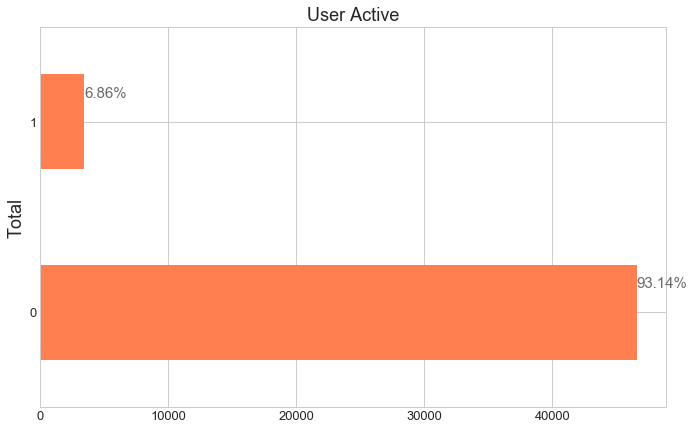

In [7]:
# let's see the User Active Status
is_active = df['is_active'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
is_active.set_alpha(0.8)
is_active.set_title("User Active", fontsize=18)
is_active.set_ylabel("Total", fontsize=18);

# create a list to collect the data
totals = []

# find the values and append to list
for i in is_active.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in is_active.patches:
    # get_width pulls left or right; get_y pushes up or down
    is_active.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')


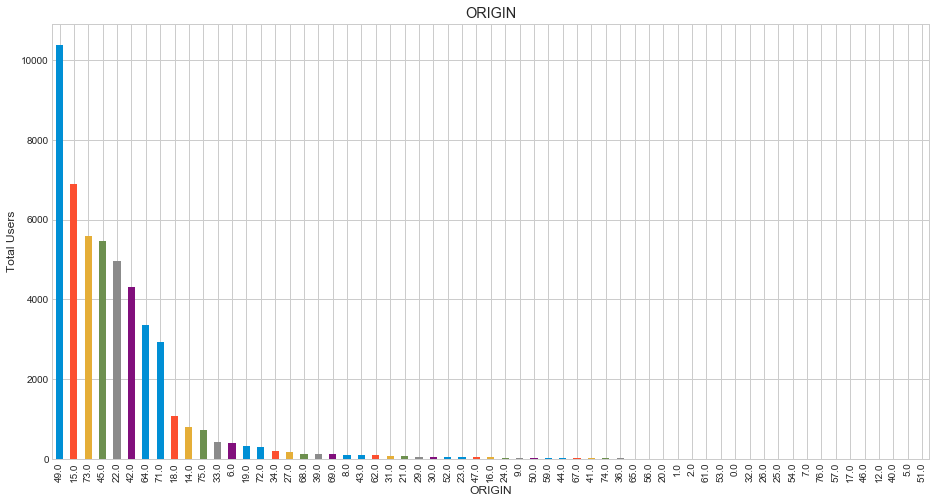

In [8]:
# let's visualize users origin
origin = df['orig_1'].value_counts().plot.bar(title="ORIGIN", figsize=(14,8))
_ = origin.set_xlabel('ORIGIN')
_ = origin.set_ylabel('Total Users')

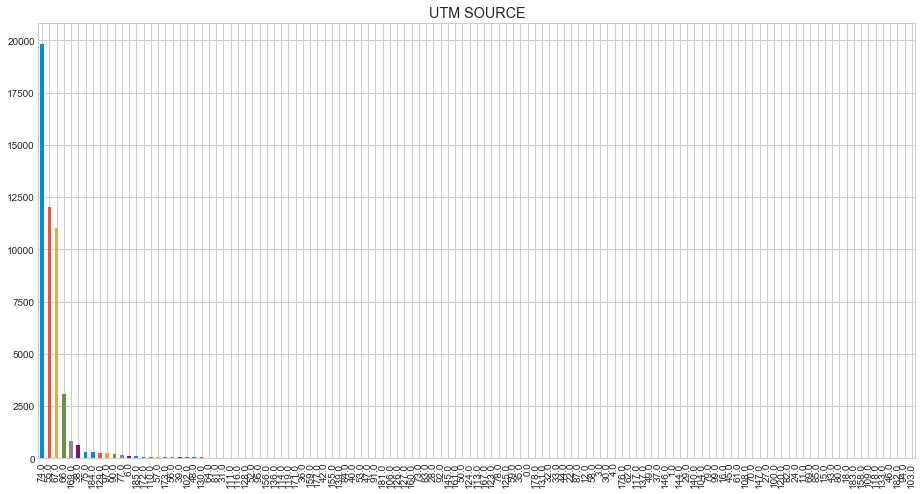

In [9]:
# let's visualize users UTM SOURCE
utm_source = df['utm_src'].value_counts().plot.bar(title="UTM SOURCE", figsize=(14,8))
_ = origin.set_xlabel('UTM SOURCE')
_ = origin.set_ylabel('Total Users')


In [10]:
# ok, there way too many UTM Sources 
# too many URLs sending traffic to the site, so let's check the top 15 
# because after the 16th source the traffic decrease to under 100 visits
df['utm_src'].value_counts().head(15)

74.0     19829
55.0     12017
67.0     11022
66.0      3073
169.0      813
38.0       648
75.0       292
184.0      272
129.0      252
97.0       240
90.0       205
77.0       153
6.0         95
185.0       83
172.0       77
Name: utm_src, dtype: int64

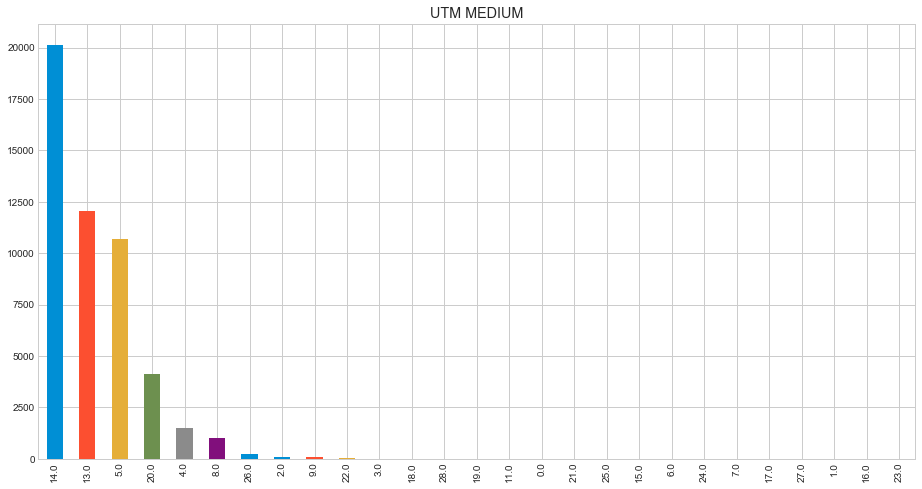

In [11]:
# let's visualize users UTM SOURCE
utm_medium = df['utm_med'].value_counts().plot.bar(title="UTM MEDIUM", figsize=(14,8))
_ = origin.set_xlabel('UTM MEDIUM')
_ = origin.set_ylabel('Total Users')


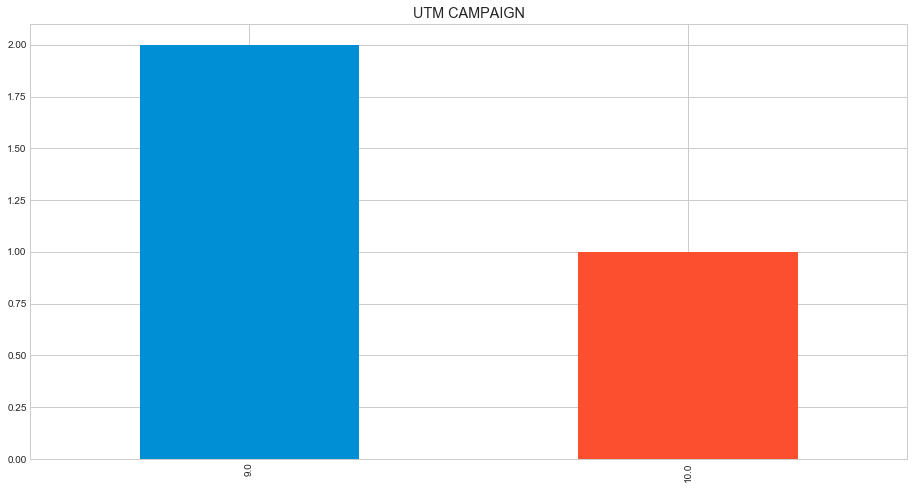

In [12]:
# let's visualize users UTM Campaign
utm_campaign = df['utm_cpg'].value_counts().plot.bar(title="UTM CAMPAIGN", figsize=(14,8))
_ = origin.set_xlabel('UTM CAMPAIGN')
_ = origin.set_ylabel('Total Users')


In [13]:
df['utm_cpg'].unique()

array([nan, 10.,  9.])

In [14]:
# let's make a copy of our dataset
new_df = df.copy()

In [17]:
# since there are several NaN on the birthyear, we will replace them.
# we will use the year 1983 because is the mean of the data we already have on the dataset 
new_df['birthyear'].fillna(1983, inplace=True)

In [18]:
# first we will transform our year to int to get rid of the float number
new_df['birthyear'] = new_df['birthyear'].astype(int)

# transform year from float to string
new_df['birthyear'] = new_df['birthyear'].astype(str)

In [19]:
# sanity check
new_df['birthyear'].head(5)

0    1990
1    1983
2    1983
3    1983
4    1994
Name: birthyear, dtype: object

In [20]:
# let's use datetime to transform the created date string into a timestamp
from datetime import datetime
from datetime import date

def get_age(born):
    born = datetime.strptime(born, "%Y").date()
    today = date.today()
    return today.year - born.year

# we transform the year to datetime
# and create a new column with the age and we add it to our main df
new_df['age'] = new_df['birthyear'].apply(get_age) 

In [21]:
new_df.head(5)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
0,161784,2017-06-27 19:26:51,1990,NaN,0,5910,308.0,45.0,NaN,74.0,...,7.0,31.104501,5.609922,38.011426,73.155654,-40.377089,0.340052,0.0,0,29
1,245769,2017-11-22 04:59:44,1983,NaN,0,5910,290.0,42.0,NaN,74.0,...,7.0,49.740220,2.608536,48.953180,75.468076,-24.818587,0.782523,0.0,0,36
2,140191,2017-05-16 15:52:38,1983,1.0,1,5326,308.0,15.0,NaN,67.0,...,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1,36
3,176141,2017-07-21 10:16:49,1983,NaN,0,5326,308.0,49.0,21385.0,55.0,...,9.0,54.493092,4.176993,50.066720,36.941482,-53.010936,0.088452,0.0,0,36
4,97642,2017-02-19 07:46:55,1994,NaN,0,5326,59.0,49.0,13773.0,55.0,...,9.0,54.268673,4.419244,68.248199,40.742681,-90.132536,0.252442,0.0,0,25


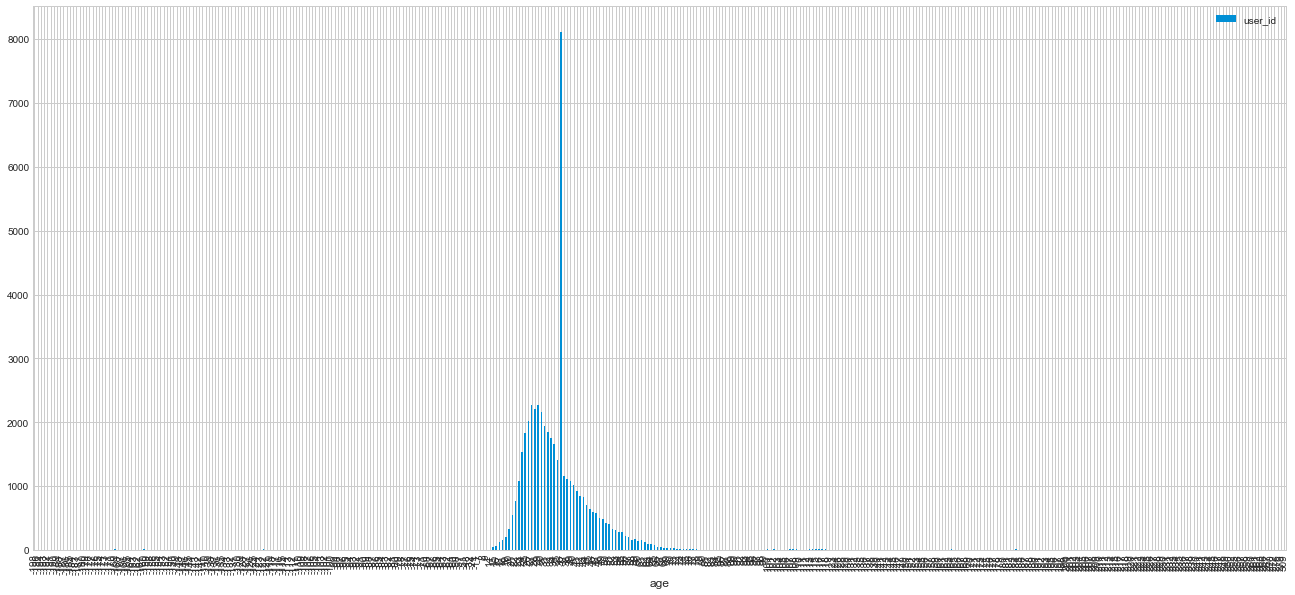

In [22]:
# Group users by age

age = new_df[['user_id','age']].groupby(by='age').count().plot(kind='bar', figsize=(20,10))

In [170]:
# there seems to be a lot of inmortal people in our dataset or they do need to give us their longetiviy secret
# we also have some users from the future! take that, people that do not belive in time travel!
# we have a lot of people that put the year of birth incorrectly, we will need to convert those to NaN
new_df['age'].unique()

array([  29,  119,   25,   39,   33,   52,   31,   46,   41,   43,   23,
         51,   28,   21,   37,   36,   16,   44,   62,   26,   32,   35,
         47,   40,  116,   50,   48,   22,   59,   34,   20,   38,   27,
         24,   30,   57,   54,   42,  117,   56,  131,   61,   19,   82,
         64,   49,   60, -184,  242,   58,   45,  309,   68,   18,   96,
        115, -176,   53,  138,   65,  -74,  114,   85,   75,  218, -137,
         70,   69,  107,   66,   55,  160,   80,  149,  193,  221, -171,
        137, -161,   17,  168,  -85,  232, -135,  -62,  -86,  183, -136,
        177,  -65, -169,  -84,  -93,  100,  -57,  154,  101,  145,   63,
        158,  217, -178,  156, -175, -152,  219,   67,  196,  147,  155,
        263, -113, -123, -121,  230,  -68,  174,  -51, -142,  200,  -81,
        -95,  109, -107, -166,   73,   71,  246,  152, -114,   76,  -75,
        227,  195,  136,  175,   95,  179, -139,  108,  185,  157,   15,
        105,  214,  250, -156, -108,  164,  173,   

In [23]:
# we will set all users that are 80 and older, and 18 and younger to NaN, since we set 1983 as our NaN, so 36 
new_df.loc[new_df.age > 80, 'age'] = 36
new_df.loc[new_df.age < 18, 'age'] = 36

In [24]:
new_df['age'].unique()

array([29, 36, 25, 39, 33, 52, 31, 46, 41, 43, 23, 51, 28, 21, 37, 44, 62,
       26, 32, 35, 47, 40, 50, 48, 22, 59, 34, 20, 38, 27, 24, 30, 57, 54,
       42, 56, 61, 19, 64, 49, 60, 58, 45, 68, 18, 53, 65, 75, 70, 69, 66,
       55, 80, 63, 67, 73, 71, 76, 72, 74, 78, 79, 77])

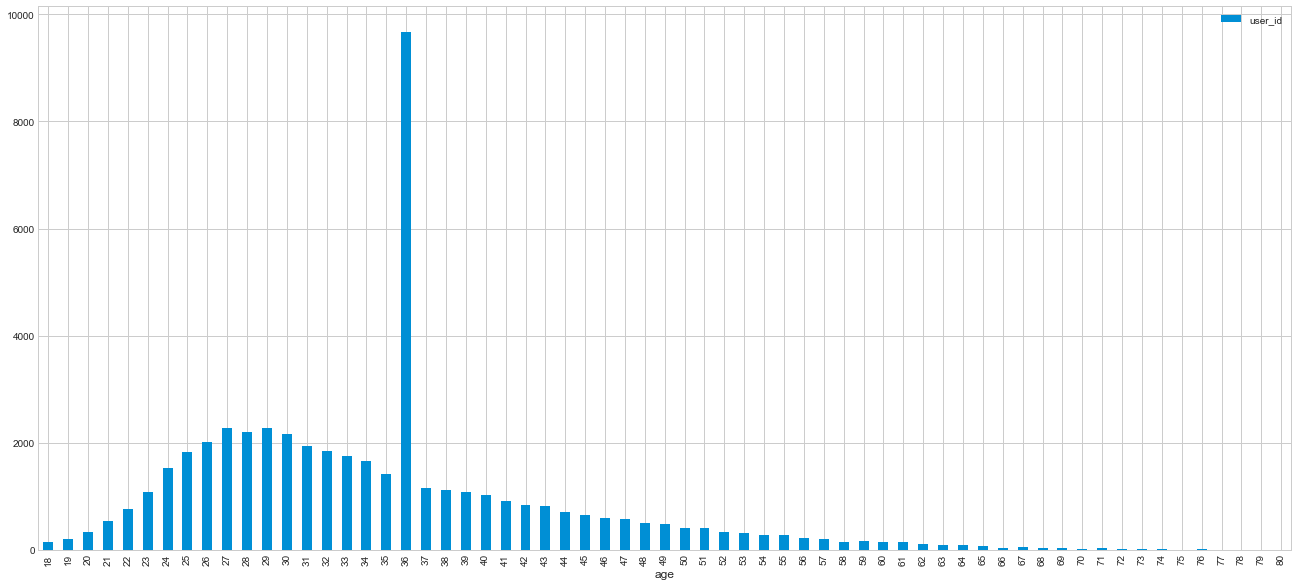

In [25]:
# Once again, group users by age
age = new_df[['user_id','age']].groupby(by='age').count().plot(kind='bar', figsize=(20,10))

In [26]:
# we will need more libraries
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [27]:
# fill nans on conversions column
new_df['utm_cpg'].fillna(0, inplace=True)

#sanity check
new_df['utm_cpg'].unique()

array([ 0., 10.,  9.])

In [28]:
# Now let's see which medium tended to have more purchases in the next 90 days

medium = new_df['utm_med'].unique().tolist()

campaign = new_df['utm_cpg'].unique().tolist()

purchases = new_df.loc[(new_df['purchase_90_bin'] == 1)]


In [29]:
# sanity check
purchases.head(5)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
2,140191,2017-05-16 15:52:38,1983,1.0,1,5326,308.0,15.0,NaN,67.0,...,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1,36
6,210933,2017-09-26 23:27:24,1986,NaN,0,5326,59.0,42.0,NaN,74.0,...,7.0,62.131167,2.133961,40.207669,66.438128,15.943469,0.861920,1.0,1,33
22,278411,2018-01-15 10:48:19,1988,NaN,0,5326,308.0,64.0,14272.0,74.0,...,7.0,63.106007,-0.075766,47.994951,34.269162,-4.338047,0.093957,2.0,1,31
33,198208,2017-09-04 18:00:30,1993,NaN,0,5326,598.0,42.0,NaN,74.0,...,1.0,56.953852,3.446351,74.957475,33.383421,-7.008063,0.141892,1.0,1,26
34,41996,2016-10-28 04:13:21,1987,NaN,0,5910,598.0,15.0,6202.0,66.0,...,10.0,59.898900,8.093323,53.057501,45.878140,-67.927725,0.786034,1.0,1,32


In [30]:
# it seems that the campaigns 10 and 9 had not converted in any purchases
purchases['utm_cpg'].unique()

array([0.])

In [31]:
# let's check for the medium sources that had converted
purchases['utm_med'].unique()

array([ 5., 14., 20., 13.,  4., 26.,  8., 21., 28., 19., 22.,  7., 18.,
        9.,  3., 17., nan, 15.,  0., 11.])

In [32]:
# fill nans on medium sources column
purchases['utm_med'].fillna(100, inplace=True)

#sanity check
purchases['utm_med'].unique()

array([  5.,  14.,  20.,  13.,   4.,  26.,   8.,  21.,  28.,  19.,  22.,
         7.,  18.,   9.,   3.,  17., 100.,  15.,   0.,  11.])

In [33]:
# Get the conversions by campaign medium 
medium_5 = purchases['age'].loc[(purchases["utm_med"] == 5.0)].values
medium_14 = purchases['age'].loc[(purchases['utm_med'] == 14.0)].values
medium_20 = purchases['age'].loc[(purchases['utm_med'] == 20.0)].values
medium_13 = purchases['age'].loc[(purchases['utm_med'] == 13.0)].values
medium_4 = purchases['age'].loc[(purchases['utm_med'] == 4.0)].values
medium_26 = purchases['age'].loc[(purchases['utm_med'] == 26.0)].values
medium_8 = purchases['age'].loc[(purchases['utm_med'] == 8.0)].values
medium_21 = purchases['age'].loc[(purchases['utm_med'] == 21.0)].values
medium_28 = purchases['age'].loc[(purchases['utm_med'] == 28.0)].values
medium_19 = purchases['age'].loc[(purchases['utm_med'] == 19.0)].values
medium_22 = purchases['age'].loc[(purchases['utm_med'] == 22.0)].values
medium_7 = purchases['age'].loc[(purchases['utm_med'] == 7.0)].values
medium_18 = purchases['age'].loc[(purchases['utm_med'] == 18.0)].values
medium_9 = purchases['age'].loc[(purchases['utm_med'] == 9.0)].values
medium_3 = purchases['age'].loc[(purchases['utm_med'] == 3.0)].values
medium_17 = purchases['age'].loc[(purchases['utm_med'] == 17.0)].values
medium_15 = purchases['age'].loc[(purchases['utm_med'] == 15.0)].values
medium_0 = purchases['age'].loc[(purchases['utm_med'] == 0.0)].values
medium_11 = purchases['age'].loc[(purchases['utm_med'] == 11.0)].values
medium_NaN = purchases['age'].loc[(purchases['utm_med'] == 100.0)].values

In [34]:
# group by different campaigns
ages = [medium_5, medium_14, medium_20, medium_13, medium_4, medium_26, medium_8, medium_21,
       medium_28, medium_19, medium_22, medium_7, medium_18, medium_9, medium_3, medium_17,
       medium_15, medium_0, medium_11, medium_NaN]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(medium, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Campaign Medium',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [35]:
# let's create a new df with the active users 
are_active = purchases.loc[(purchases['is_active'] == 1)]

# sanity check
are_active.head(5)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
2,140191,2017-05-16 15:52:38,1983,1.0,1,5326,308.0,15.0,NaN,67.0,...,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1,36
92,215284,2017-10-04 15:46:11,1980,NaN,1,5910,234.0,15.0,NaN,74.0,...,7.0,59.783630,4.585251,63.632020,75.715229,27.803568,0.050248,3.0,1,39
131,79760,2017-01-12 13:24:57,1986,NaN,1,3429,234.0,15.0,NaN,40.0,...,10.0,56.512977,3.513142,54.085296,68.167314,-47.707167,0.023809,3.0,1,33
200,87933,2017-01-30 04:19:28,1986,NaN,1,5326,598.0,42.0,NaN,67.0,...,4.0,63.668494,5.680537,55.625724,43.142073,31.750842,0.299648,1.0,1,33
533,215179,2017-10-04 12:50:15,1988,NaN,1,5919,863.0,15.0,NaN,55.0,...,10.0,58.598180,2.513503,32.202997,66.559276,31.940337,0.220833,1.0,1,31


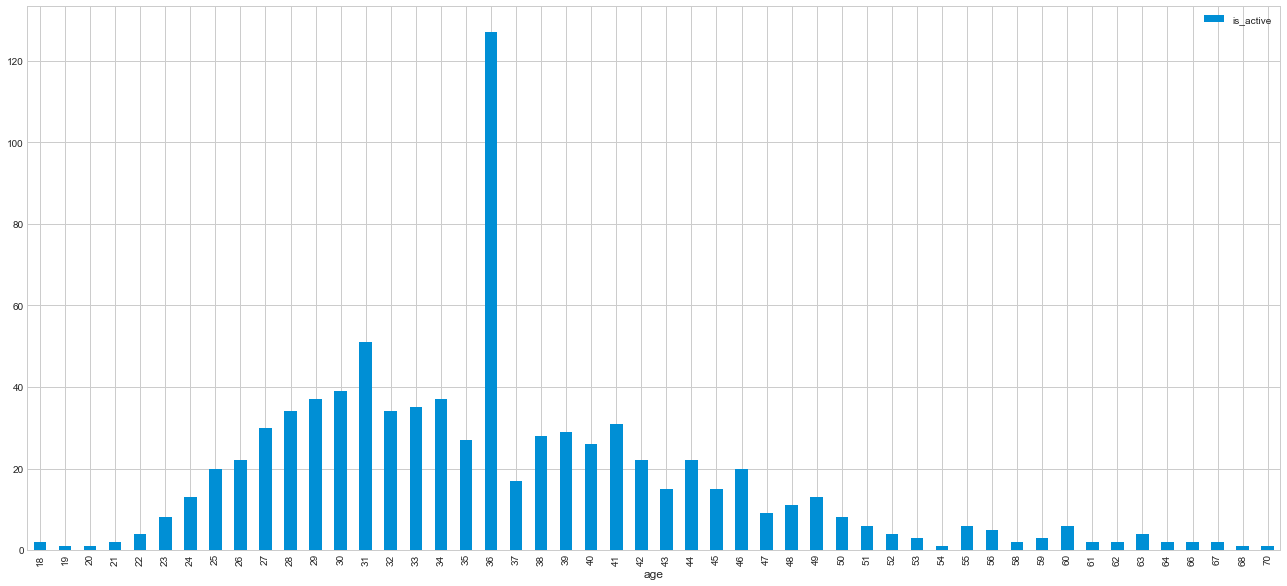

In [36]:
# How many customers are active by age
active_ = are_active[['is_active','age']].groupby(by='age').count().plot(kind='bar', figsize=(20,10))

In [37]:
total_active = are_active.shape
print('Total Active Users:', total_active[0])

Total Active Users: 842


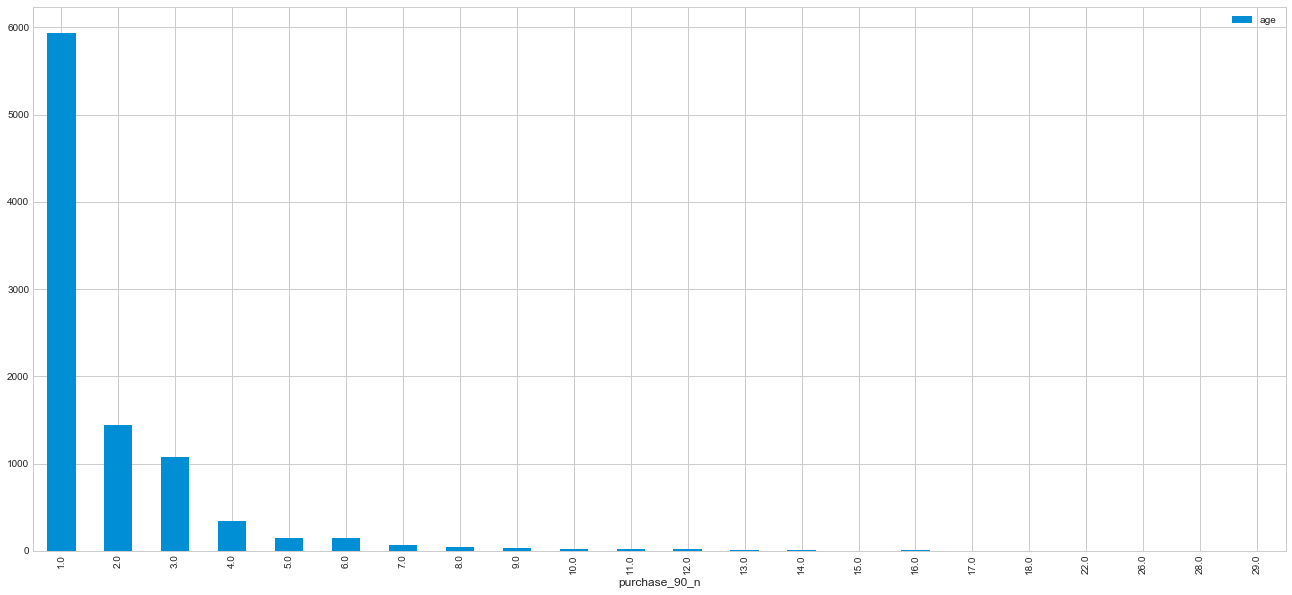

In [38]:
# How Many purchases they make 
recurrent = purchases[['purchase_90_n','age']].groupby(by='purchase_90_n').count().plot(kind='bar', figsize=(20,10))

In [39]:
recurrent_customers = purchases.copy()

In [40]:
# let's create a new df with the active users 
recurrent_customers = recurrent_customers.loc[(purchases['purchase_90_n'] > 1)]

# sanity check
recurrent_customers.head(2)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
2,140191,2017-05-16 15:52:38,1983,1.0,1,5326,308.0,15.0,NaN,67.0,...,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1,36
22,278411,2018-01-15 10:48:19,1988,NaN,0,5326,308.0,64.0,14272.0,74.0,...,7.0,63.106007,-0.075766,47.994951,34.269162,-4.338047,0.093957,2.0,1,31


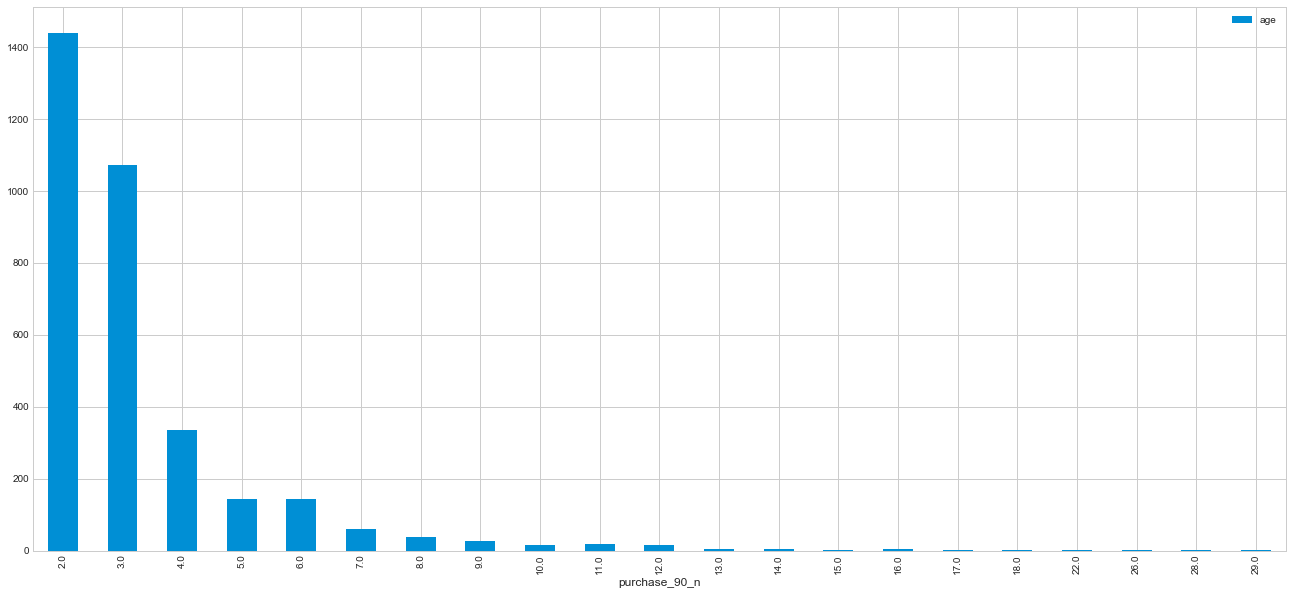

In [41]:
# How many purchases they make after first one
recurrent_ = recurrent_customers[['purchase_90_n','age']].groupby(by='purchase_90_n').count().plot(kind='bar', figsize=(20,10))


In [42]:
total_recurrent = recurrent_customers.shape
print('Total Recurrent Customers:', total_recurrent[0])

Total Recurrent Customers: 3337


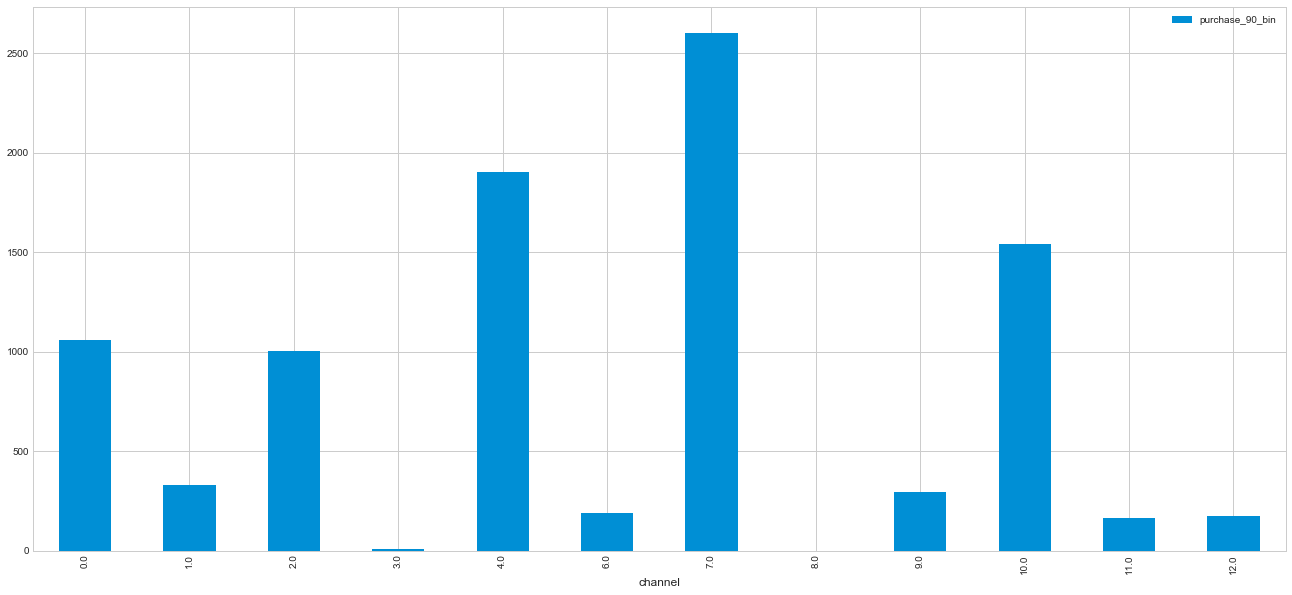

In [43]:
# channel adquisition
channel = purchases[['purchase_90_bin','channel']].groupby(by='channel').count().plot(kind='bar', figsize=(20,10))


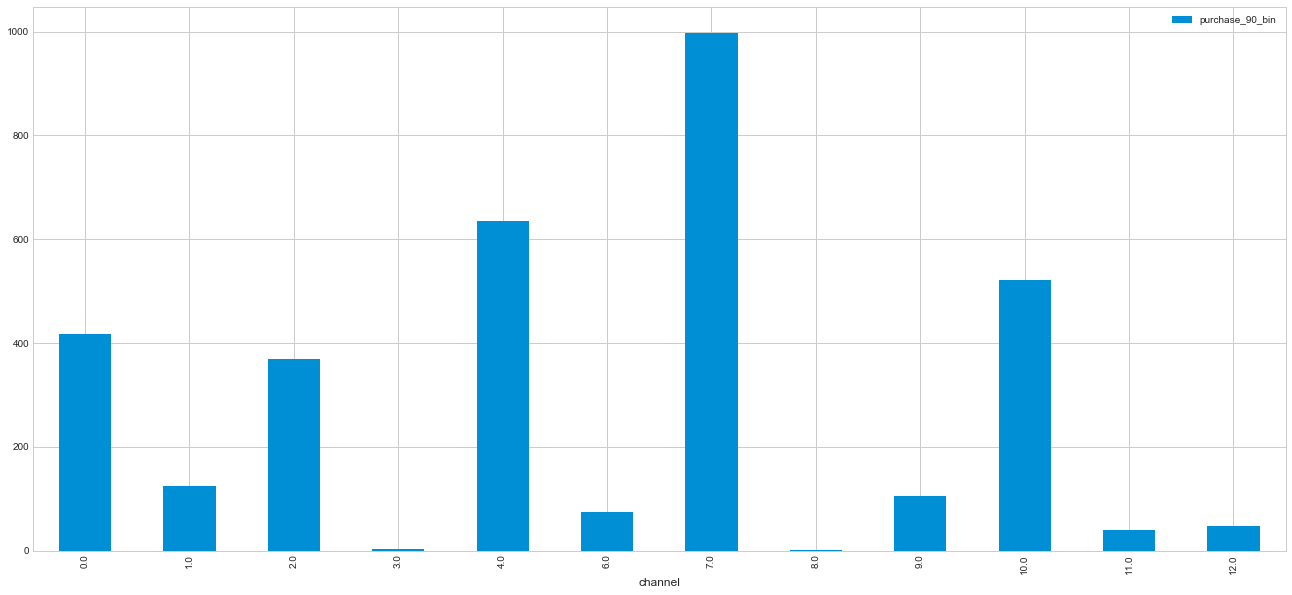

In [44]:
# recursive buyers by channel (more than one purchase in the first 90 days)
channel_ = recurrent_customers[['purchase_90_bin','channel']].groupby(by='channel').count().plot(kind='bar', figsize=(20,10))


In [45]:
# let's get a little bit deeper in channel 7
# let's see how gender repond to that channel acquisition
channel_7 = purchases.loc[(purchases['channel'] == 7)]

# sanity check
channel_7.head(3)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
6,210933,2017-09-26 23:27:24,1986,NaN,0,5326,59.0,42.0,NaN,74.0,...,7.0,62.131167,2.133961,40.207669,66.438128,15.943469,0.861920,1.0,1,33
22,278411,2018-01-15 10:48:19,1988,NaN,0,5326,308.0,64.0,14272.0,74.0,...,7.0,63.106007,-0.075766,47.994951,34.269162,-4.338047,0.093957,2.0,1,31
45,50107,2016-11-12 19:26:37,1979,NaN,0,5910,308.0,22.0,NaN,74.0,...,7.0,56.904786,8.023747,51.693125,36.263091,-22.265493,0.271132,9.0,1,40


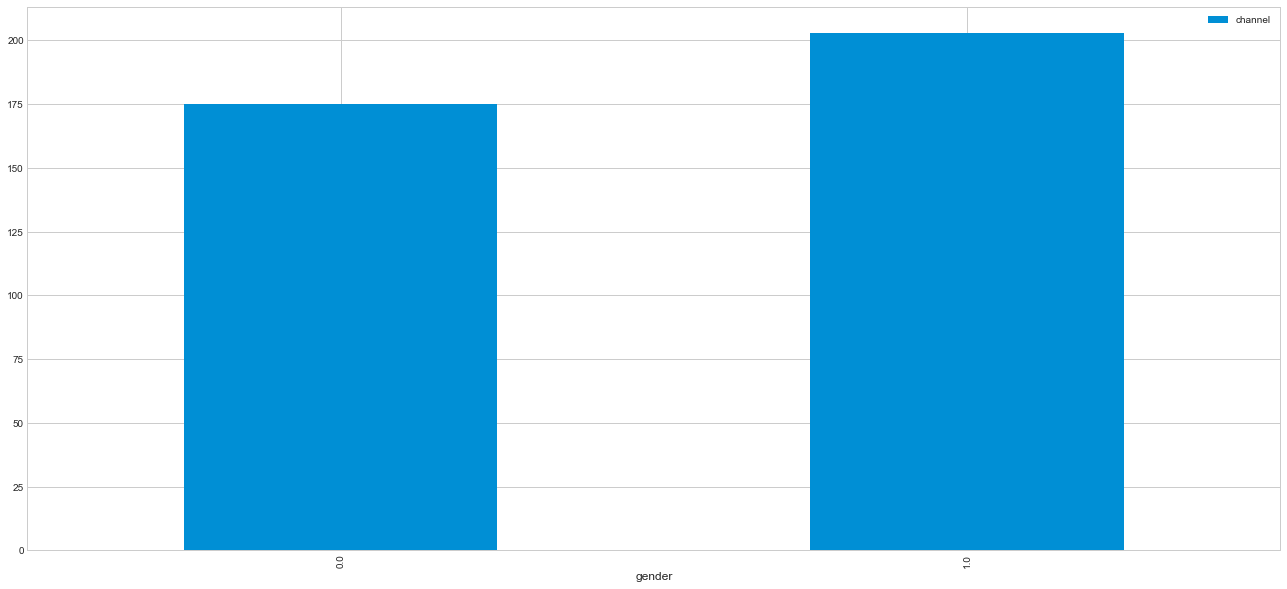

In [46]:
# channel 7 by gender
channel__7 = channel_7[['gender','channel']].groupby(by='gender').count().plot(kind='bar', figsize=(20,10))


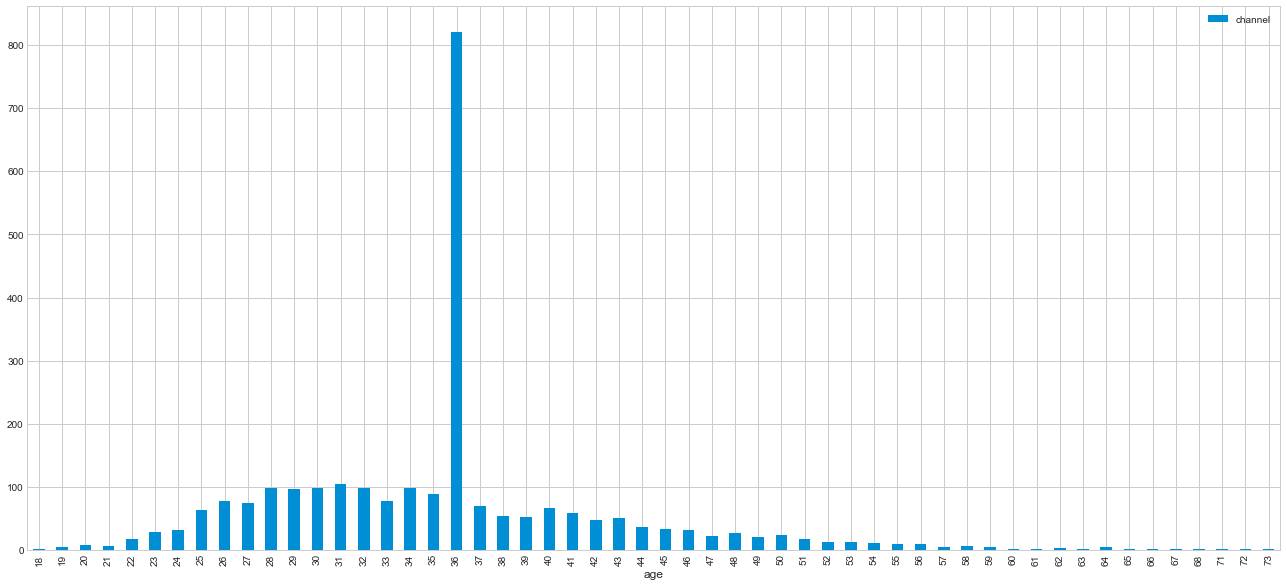

In [47]:
channel__7 = channel_7[['age','channel']].groupby(by='age').count().plot(kind='bar', figsize=(20,10))


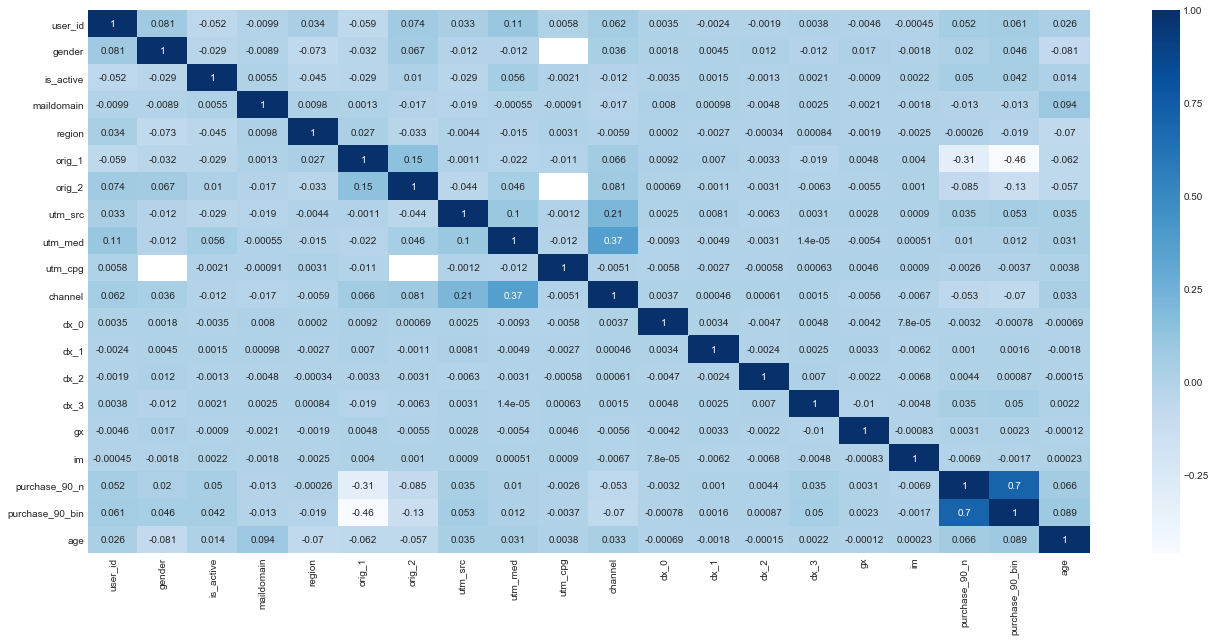

In [48]:
# full dataframe correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(new_df.corr(),cmap='Blues',annot=True)

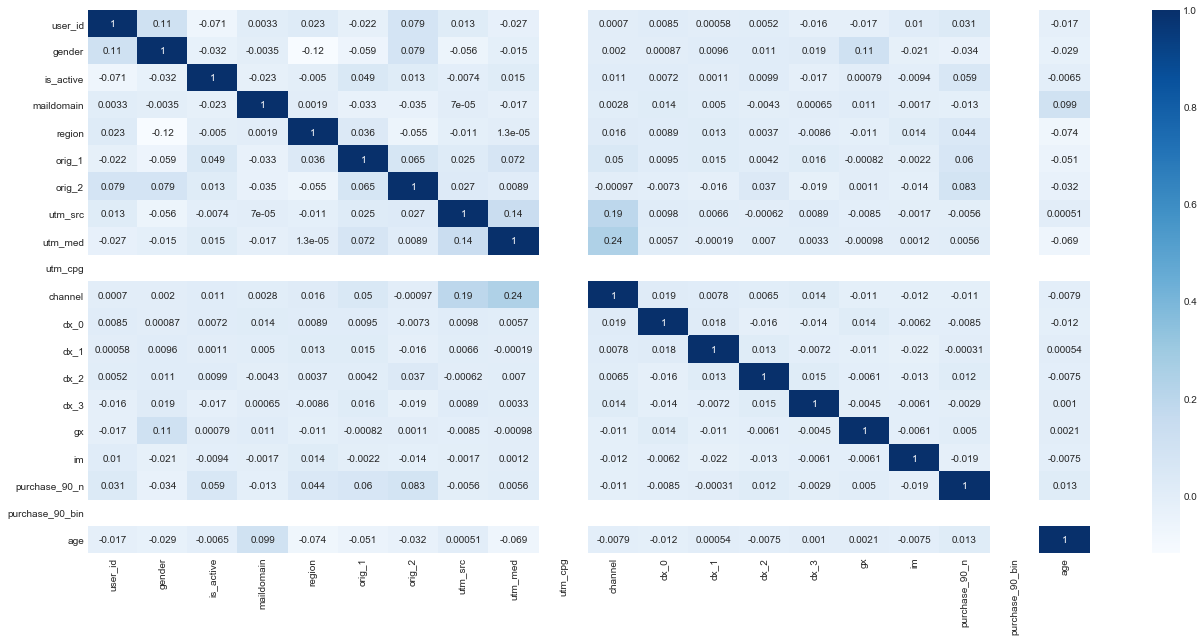

In [49]:
# Purchases DF correlation 
plt.figure(figsize = (20,10))
sns.heatmap(purchases.corr(),cmap='Blues',annot=True)

In [50]:
# lets save the our new datasets as csv, it might be usefull later for our model creation.
new_df.to_csv('new_df.csv', header=True, index=False, encoding='utf-8')
purchases.to_csv('purchases.csv', header=True, index=False, encoding='utf-8')
are_active.to_csv('are_active.csv', header=True, index=False, encoding='utf-8')
recurrent_customers.to_csv('recurrent_customers.csv', header=True, index=False, encoding='utf-8')